# Data Science - Lab 1

Members: <br>
 - Ernest Onifade<br>
 - Harry Setiawan Hamjaya <br>
 - Mariama Oliveira


In [ ]:
#Importing libraries
from bs4 import BeautifulSoup
import requests
import csv
import seaborn as sns
import pandas as pd
import ast
from IPython.display import Image
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Getting the data

In [ ]:
def get_info_page(href):

  #Requesting recipe page
  recipe_source = requests.get(href).text
  recipe_soup = BeautifulSoup(recipe_source, 'lxml')

  #Extracting info from the recipe page
  recipe_title = recipe_soup.find('h1', class_='entry-title').text
  recipe_page = recipe_soup.find('div', class_='ast-post-format- single-layout-1 ast-no-date-box')
  recipe_summary = recipe_page.find('div', class_='entry-content clear').find("p").text
  recipe_cal = recipe_soup.find('span', class_='recipe-meta-value value-calories').text
  recipe_cal_number = recipe_cal[6:]

  return {"Name": recipe_title, "summary": recipe_summary, "Calories": recipe_cal_number}

In [ ]:
def get_one_page(page_url):

  #Requesting page with multiple recipes
  source = requests.get(page_url).text
  soup = BeautifulSoup(source, 'lxml')

  #List responsible for storing the data
  recipes_list = []

  #Find all Recipes in the page
  articles = soup.find_all("div", class_="ast-post-format- blog-layout-1 ast-no-date-box")

  #Loops through all recipe to get the details
  for article in articles:

    try:
      # URL for the Recipe Page
      points = article.find('div', class_='wprm-ww-points').text
      url = article.find('div', class_='post-thumb-img-content post-thumb')
      links = url.find("a")
      href = links.get("href")
      recipe_info = article.find('ul', class_='recipe-type-post-icons').find_all("a")
      image = article.find("img")["src"]

       # Getting all recipes key
      recipe_keys = []
      for data in recipe_info:
        recipe_keys.append(data.find("img")["alt"])

      #Requesting info inside the page
      page_info = get_info_page(href)

      #Creating dic with all recipe info
      article_info = {"Name": page_info["Name"], "Image": image, "Calories": page_info["Calories"], "Points": points, "Summary": page_info["summary"], "Receipe Key": recipe_keys}
      recipes_list.append(article_info)

    except Exception as e:
      #Its throws an exception in case of retrieving something different from a recipe
      #print(e)
      pass

  return recipes_list

In [ ]:
#Looping through all first 30 pages
list_all_pages = []

for i in range(1, 31):
    page_url = 'https://www.skinnytaste.com/recipe-index/?_paged=' + str(i)
    page_list = get_one_page(page_url)
    list_all_pages+= page_list

## Converting to a Panda dataframe

In [ ]:
df = pd.DataFrame.from_dict(list_all_pages)
df.head()

In [ ]:
#Saving into csv
df.to_csv("recipes_data.csv", index = False)

# Visualizing Data

In [ ]:
# If you don't want to scrap the data, you can uncomment this part

# from google.colab import drive
# drive.mount('/content/drive')
# file_id = '1lCMBAQifRI5QWaGgrfnBWnku32OnIEBV'
# link_csv = f'https://drive.google.com/uc?id={file_id}'

Mounted at /content/drive


In [ ]:

# Opening csv file
df = pd.read_csv(link_csv)
df.head()

,Name,Image,Calories,Points,Summary,Receipe Key
0,Chicken Nuggets,https://www.skinnytaste.com/wp-content/uploads...,280.0,7,"These picky-kid-approved, healthy Chicken Nugg...","['Air Fryer', 'Dairy Free', 'Gluten Free', 'Ki..."
1,Classic Egg Salad,https://www.skinnytaste.com/wp-content/uploads...,185.0,3,This easy egg salad recipe is the perfect make...,"['Dairy Free', 'Gluten Free', 'Keto Recipes', ..."
2,Mini Pumpkin Chocolate Chip Muffins,https://www.skinnytaste.com/wp-content/uploads...,160.0,6,Mini Pumpkin Chocolate Chip Muffins made light...,"['Kid Friendly', 'Vegetarian Meals']"
3,Banana Bread Recipe,https://www.skinnytaste.com/wp-content/uploads...,123.0,4,"When I have ripe bananas on my counter, I alwa...","['Dairy Free', 'Kid Friendly', 'Vegetarian Mea..."
4,Cinnamon-Raisin Overnight Oats,https://www.skinnytaste.com/wp-content/uploads...,378.0,8,Easy Cinnamon-Raisin Overnight Oats are the pe...,"['Dairy Free', 'Gluten Free', 'Meal Prep Recip..."


In [ ]:
# Verifying number of recipies

df_shape = df.shape
print(f"There {df_shape[0]} recipes with {df_shape[1]} features")

There 562 recipes with 6 features


## Visualizing **Calories** distribution

Showing top/botton 3 calories recipes

In [ ]:
df_top_3 = df.sort_values(["Calories"], ascending = False).head(3)
df_top_3

,Name,Image,Calories,Points,Summary,Receipe Key
187,Sheet Pan Thanksgiving Dinner for Four,https://www.skinnytaste.com/wp-content/uploads...,608.0,10,This easy Sheet Pan Thanksgiving dinner for fo...,"['Dairy Free', 'Gluten Free', 'Kid Friendly']"
392,Beef Stew with Pumpkin,https://www.skinnytaste.com/wp-content/uploads...,600.0,10,This hearty beef stew recipe cooks low and slo...,"['Dairy Free', 'Freezer Meals', 'Gluten Free',..."
335,Roasted Sweet Potato Black Bean Bowls,https://www.skinnytaste.com/wp-content/uploads...,585.0,11,These Roasted Sweet Potato Black Bean Bowls wi...,"['Dairy Free', 'Gluten Free', 'Meal Prep Recip..."


In [ ]:
df_bottom_3 = df.sort_values(["Calories"]).head(3)
df_bottom_3

,Name,Image,Calories,Points,Summary,Receipe Key
54,Taco Seasoning Recipe,https://www.skinnytaste.com/wp-content/uploads...,8.0,0,"My go-to, homemade taco seasoning recipe made ...","['Dairy Free', 'Gluten Free', 'Keto Recipes', ..."
59,Pickled Red Onions,https://www.skinnytaste.com/wp-content/uploads...,16.0,0,These easy pickled red onions are delicious an...,"['Dairy Free', 'Gluten Free', 'Low Carb', 'Veg..."
529,Citrus Immunity Shots,https://www.skinnytaste.com/wp-content/uploads...,25.0,0,"This super-simple-to-prepare, inexpensive Citr...","['Dairy Free', 'Gluten Free', 'Paleo', 'Under ..."


Visualizing Histogram and Boxplot

[Text(0.5, 1.0, 'Calories Boxplot')]

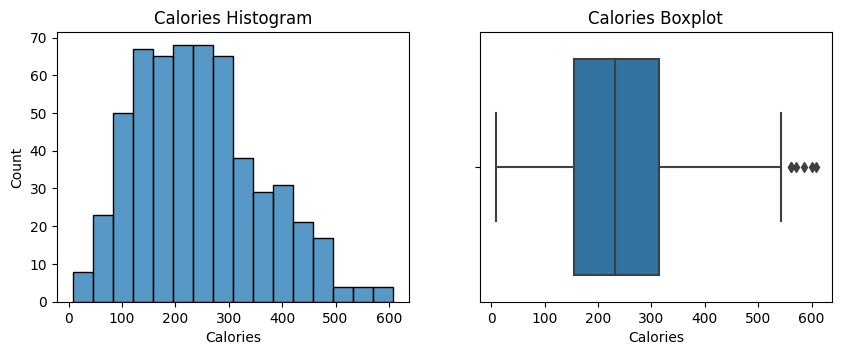

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3.5))
sns.histplot(data=df, x="Calories", ax=ax1).set(title='Calories Histogram')
sns.boxplot(x=df["Calories"], ax=ax2).set(title='Calories Boxplot')

- From the histogram chart, most recipes spread between 100-300 calories, with only a few recipes with more than 500 calories.
- This can be confirmed when we visualize the corresponding boxplot, where the mean of calories is between 200 and 250.
- Also, from the boxplot, we can see that the outliers are above around 550 calories.

## Visualizing **Points** distribution

Visualizing Histogram and Boxplot

[Text(0.5, 1.0, 'Points Boxplot')]

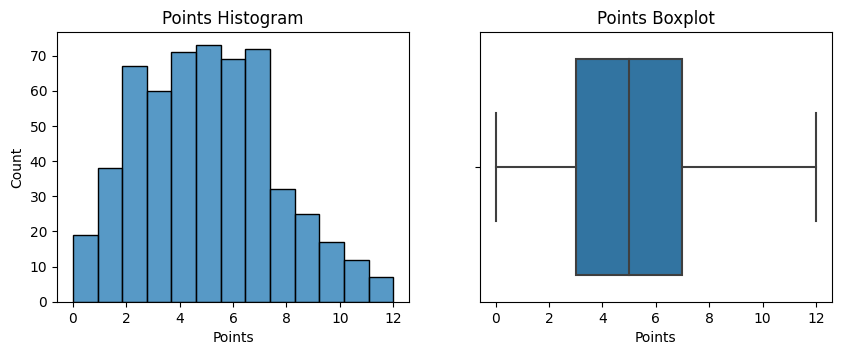

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3.5))
sns.histplot(data=df, x="Points", ax=ax1).set(title='Points Histogram')
sns.boxplot(x=df["Points"], ax=ax2).set(title='Points Boxplot')

- From the histogram chart, most recipes spread between 2-7 points.
- This can be confirmed when we visualize the corresponding boxplot, where the mean of points is around 5 points.

Scatterplot Calories vs Points

[Text(0.5, 1.0, 'Calories vs Points Scatter plot')]

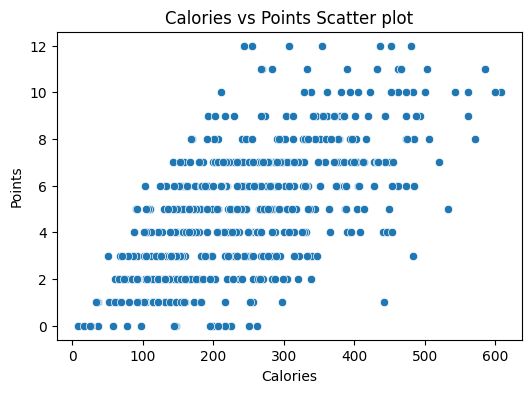

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=df, x="Calories", y="Points", ax=ax).set(title='Calories vs Points Scatter plot')

- The more calories, the higher the possibility of getting better points.


## Visualizing **Recipe Key** distribution

In [ ]:
#Visualizing Barplot
df['Receipe Key'] = df['Receipe Key'].apply(ast.literal_eval)
keys = pd.get_dummies(df['Receipe Key'].explode()).groupby(level=0).sum()
receipe_keys_sum = keys.sum().reset_index().rename(columns={"index": "Receipe Keys", 0: "count"})
receipe_keys_sum.sort_values("count", ascending = False, inplace = True)

[Text(0.5, 1.0, 'Number of recipes by key')]

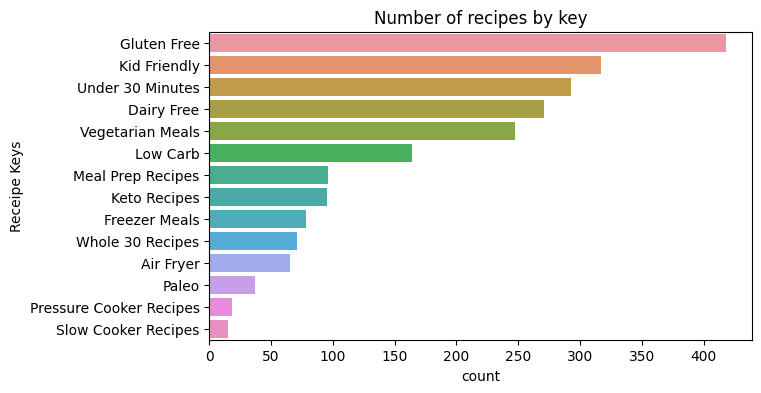

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data = receipe_keys_sum, x = "count", y="Receipe Keys", ax=ax).set(title='Number of recipes by key')

- The majority of the recipes are Gluten Free.
- Followed by Kid Friendly, Under 30 Minutes, Dairy Free, Vegetarian Meals.
- On the other hand, a minority of recipes are Slow Cooker and Pressure Cooker Recipes.

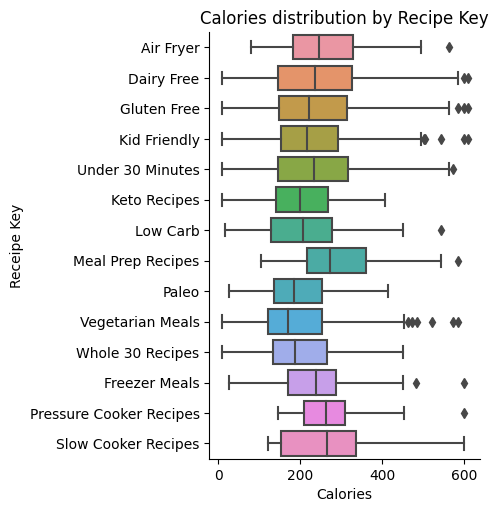

In [ ]:
df_cal_keys = df[['Calories','Receipe Key']]
df_cal_keys = df_cal_keys.explode('Receipe Key').reset_index()
sns.catplot(data=df_cal_keys, x="Calories", y="Receipe Key", kind="box").set(title='Calories distribution by Recipe Key')

- The Distribution of Vegetarian Meals mostly with lower calories. However, there are some outliers.
- The same thing happens for Kid Friendly and Gluten Free.
- There are categories with higher mean calories compared to each other, for instance: Meal Prep Recipes, Pressure Cooker Recipes, Slow Cooker Recipes.

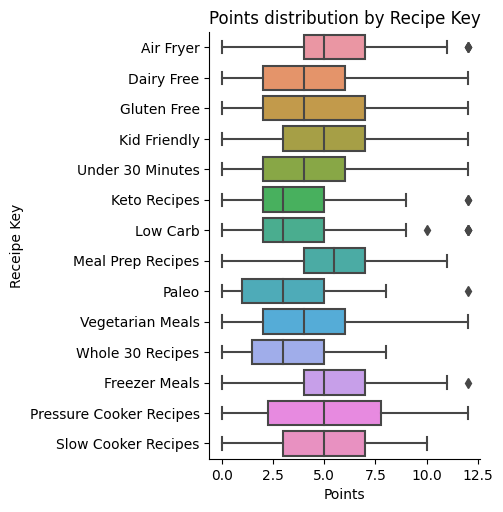

In [ ]:
df_points_keys = df[['Points','Receipe Key']]
df_points_keys = df_points_keys.explode('Receipe Key').reset_index()
sns.catplot(data=df_points_keys, x="Points", y="Receipe Key", kind="box").set(title='Points distribution by Recipe Key')

- Most categories have an average 5 points except for Keto Recipes, Low Carb, Pale, and Whole 30 Recipes.
- Freezer Meals and Meal Prep Recipes have a smaller distribution between the Interquartile (Q3-Q1).

# Running a simple application

In [ ]:
def process(mini_calories, maxi_calories, mini_point, maxi_point, ascending):
  if maxi_calories<mini_calories or maxi_point<mini_point:
    print(maxi_calorie, mini_calorie)
    print(maxi_point, mini_point)
    print("Hey!?!? Maximum Should Be Greater Than Minimum, at least Equal. I won't do the filter for you")
    df_sorted = df.sort_values(["Calories"], ascending = ascending).head(5).reset_index()
  else:
    df_filtered = df[((df["Calories"]>=mini_calories)&(df["Calories"]<=maxi_calories)) & ((df["Points"]>=mini_point)&(df["Points"]<=maxi_point))]
    if len(df_filtered)<5 and len(df_filtered)>0 :
      length = len(df_filtered)
      print("Sorry \U0001F605, We can't show you the top 5, we are sorry about this, we only have " +str(length)+" data")
      df_sorted = df_filtered
    elif len(df_filtered)==0 :
      print("Sorry \U0001F972, We didn't have enouugh data, but at least we can provide you Non-Filtered data")
      df_sorted = df_filtered
    else:
      df_sorted = df_filtered.sort_values(["Calories"], ascending = ascending).head(5).reset_index()
  return df_sorted

In [ ]:
calories_maxi = df["Calories"].max()
calories_mini = df["Calories"].min()
point_maxi = df["Points"].max()
point_mini = df["Points"].min()
calories_median = (calories_maxi+calories_mini)//2
point_median = (point_maxi+point_mini)//2

In [ ]:
sorter = widgets.ToggleButtons(
            options=['Ascending', 'Descending']
        )

In [ ]:
def display_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
calories_min = widgets.IntSlider(
            value=calories_median, # default value
            min=calories_mini,
            max=calories_maxi,
            step=1,
            style={'description_width': 'Minimum Calories', 'handle_color': '#16a085'}
        )

calories_max = widgets.IntSlider(
            value=calories_median, # default value
            min=calories_mini,
            max=calories_maxi,
            step=1,
            style={'description_width': 'Maximum Calories', 'handle_color': '#16a085'}
        )

In [ ]:
point_min = widgets.IntSlider(
            value=point_median, # default value
            min=point_mini,
            max=point_maxi,
            step=1,
            style={'description_width': 'Minimum point', 'handle_color': '#16a085'}
        )

point_max = widgets.IntSlider(
            value=point_median, # default value
            min=point_mini,
            max=point_maxi,
            step=1,
            style={'description_width': 'Maximum point', 'handle_color': '#16a085'}
        )

In [ ]:
def print_result():
  if sorter.value == "Ascending" :
    ascending = True
  else:
    ascending = False
  result_df = process(calories_min.value, calories_max.value, point_min.value, point_max.value, ascending)
  if len(result_df) == 5:
    for index in range(0, len(result_df)):
      print("Rank: ", index+1)
      print(result_df["Name"][index])
      response = requests.get(result_df["Image"][index])
      img = Image.open(BytesIO(response.content))
      print(result_df["Summary"][index])
      display_image(img)

In [ ]:
# button send
button_1_send = widgets.Button(
                description='Process',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print_result()

button_1_send.on_click(on_button_clicked)

vbox_result_1 = widgets.VBox([button_1_send, output])

In [ ]:
# button send
button_2_send = widgets.Button(
                description='Clear',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()

button_2_send.on_click(on_button_clicked)

vbox_result_2 = widgets.VBox([button_2_send, output])

In [ ]:
text_0 = widgets.HTML(value="<h1>Dear Customer \U0001F603, Choose Your Meal Composition !!! </h1>")
note_0 = widgets.HTML(value="<h3>Note: You can input the data instead of sliding it </h3>")
text_1 = widgets.HTML(value="<h2>Minimal Calories (The Smaller It Is, The Worse It Tastes)</h2>")
text_2 = widgets.HTML(value="<h2>Maximal Calories (The Greater It Is, The Fatter You Will Be)</h2>")
text_3 = widgets.HTML(value="<h2>Minimal Points</h2>")
text_4 = widgets.HTML(value="<h2>Maximal Points</h2>")
text_5 = widgets.HTML(value="<h2>How Do You Want to Sort Your Food?</h2>")
text_6 = widgets.HTML(value="<h2>We will sort Calories only, Since we believe you want a good point for your meal \U0001F609</h2>")
text_7 = widgets.HTML(value="<h2>Show me the results</h2>")
text_8 = widgets.HTML(value="<h2>Clear the current results</h2>")

vbox_text = widgets.VBox([text_0, note_0, text_1, calories_min, text_2, calories_max, text_3, point_min, text_4, point_max, text_5, text_6, sorter, text_7, vbox_result_1, text_8, vbox_result_2])

In [ ]:
page = widgets.HBox([vbox_text])
display(page)